In [12]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from sklearn.cluster import KMeans
import math

In [11]:
# helper functions
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

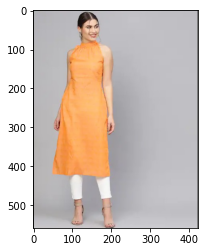

In [13]:
# reading and visualizing the image
img = cv2.imread(r"C:\Users\manav\OneDrive\Desktop\Image Tagging\sample_images\image1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

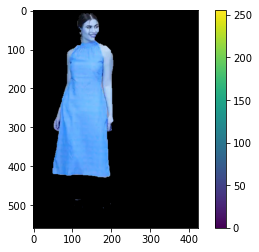

In [14]:
#applying grabcut algorithm to remove background
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,8,350,500)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
# applying kmeans tom get top 2 colors in image after removing background
modified_img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
clf = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10,
    random_state=None, tol=0.0001, verbose=0)
labels = clf.fit_predict(modified_img)

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]


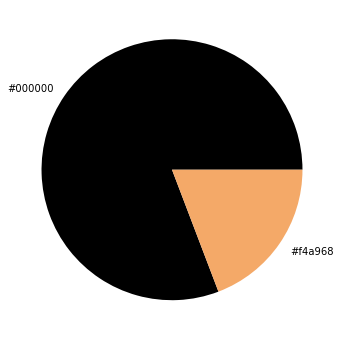

In [16]:
plt.figure(figsize = (8, 6));
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors);

In [18]:
min_ = math.inf
idx = -1
for key,value in counts.items():
    if value < min_:
        idx = key 

dress_rgb = rgb_colors[idx]

In [19]:
dress_rgb

array([244.22634182, 169.24204886, 104.0291795 ])

In [20]:
#getting the closest color
from math import sqrt
COLORS = {
    'red' : (255,0,0),
    'green' : (0,255,0),
    'blue' : (0,0,255),
    'yellow' : (255,255,0),
    'brown' : (165,42,42),
    'orange' : (255, 165, 0)
}

def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color_name,color in COLORS.items():
        cr, cg, cb = color
        color_diff = sqrt(((r - cr)*0.3)**2 + ((g - cg)*0.59)**2 + ((b - cb)*0.11)**2)
        color_diffs.append((color_diff, color,color_name))
    return min(color_diffs)[2]


closest_color(dress_rgb)
# => (23, 186, 241)

'orange'